# GSEA Enrichment Analysis on MIR100HG High vs. Low Expression Groups

**Why GSEA:**

* **Objective Motivation:**  
Due to the often subtle expression differences among real-world patient samples, there is a risk that using traditional differential gene expression (DEG) thresholds (e.g., p-value or logFC cutoffs) might overlook biologically relevant pathways. To avoid this, we adopted **Gene Set Enrichment Analysis (GSEA)**, which utilizes a ranked list of all genes based on expression changes. GSEA is particularly effective for identifying coordinated yet subtle regulation patterns, making it suitable for complex diseases like pancreatic cancer. Up- and down-regulated pathways can be directly interpreted through the **NES (Normalized Enrichment Score)**.

* **Subjective Motivation:**  
Our DEG list is skewed to include mainly **upregulated genes**, as downregulated genes with `log2FC < 0` were largely excluded. Therefore, attempts to perform enrichment analysis (e.g., with Enrichr) on downregulated DEGs yield no results. GSEA, however, allows us to identify **significantly downregulated pathways** and extract **leading-edge genes**—the key contributors to negative NES values. These genes can then be used in tools like Enrichr for downstream analysis.

This approach offers key advantages:
- **Not limited by the presence of downregulated genes in the DEG list:** GSEA works on the full ranked gene list.
- **Represents functionally suppressed core regulators:** Leading-edge genes are those driving the downregulation of pathways.
- **Perfectly aligned with our research context:** i.e., identifying suppressed pathways in the MIR100HG high-expression group.

---

## Required Input Files

| File | Description | Notes |
|------|-------------|-------|
| **DEG Table** | Differential expression results | Must include gene symbols; recommended to include `log2FC`, `p-value`, or `FDR`. (e.g., `PAAD_DEG_Significant_Results.csv`) |
| **Background Gene Set (Optional)** | All expressed genes | Used as the enrichment background. If not provided, default is the full human genome. |
| **Expression Matrix (Optional)** | Raw gene expression data | Not necessary if DEGs are already available. Only required for performing your own DEG analysis prior to GSEA. |



In [12]:
! pip install gseapy

   ---------------------------------------- 0.0/419.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/419.9 kB ? eta -:--:--
   --- ----------------------------------- 41.0/419.9 kB 991.0 kB/s eta 0:00:01
   -------------------------------- ------- 337.9/419.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 419.9/419.9 kB 3.3 MB/s eta 0:00:00


In [47]:
import pandas as pd
import gseapy as gp

# 1. Load DEG file
deg_df = pd.read_csv(r"D:\project data\M-28\NTU_DATA_CLEANED\PAAD_DEG_Significant_Results.csv")###用的是PAAD_DEG_Significant_Results文件!!

# 2. Build a sorting list（gene: log2FC）
rnk = deg_df[["HGNC_Symbol", "Log2_Fold_Change"]].dropna()
rnk.columns = ["Gene", "Score"]
rnk = rnk.sort_values("Score", ascending=False)

# 3. GSEA
gsea_res = gp.prerank(
    rnk=rnk,
    gene_sets=["GO_Biological_Process_2021", "KEGG_2021_Human"],
    processes=4,
    permutation_num=100,  
    outdir="gsea_results_mir100hg",  
    seed=42,
    min_size=15,
    max_size=500,
    verbose=True
)

# 4. Show top10 path
print("\nTop GSEA Results (GO + KEGG):")
print(gsea_res.res2d.sort_values("FDR q-val", ascending=True).head(10))


D:\Users\TEMP\ipykernel_10176\128470163.py:13: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-30 20:02:28,567 [WARNING] Duplicated values found in preranked stats: 0.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-30 20:02:28,567 [INFO] Parsing data files for GSEA.............................
2025-03-30 20:02:28,592 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-30 20:02:28,788 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-30 20:02:28,840 [INFO] 5841 gene_sets have been filtered out when max_size=500 and min_size=15
2025-03-30 20:02:28,840 [INFO] 0515 gene_sets used for further statistical testing.....
2025-03-30 20:02:28,840 [INFO] Start to run GSEA...Might take a while..................
2025-03-30 20:02:42,226 [INFO] Congratulations. GSEApy runs successfully.....


Top GSEA Results (GO + KEGG):
       Name                                               Term        ES  \
0   prerank                       KEGG_2021_Human__Shigellosis -0.434383   
3   prerank         KEGG_2021_Human__Lipid and atherosclerosis -0.326847   
2   prerank      KEGG_2021_Human__Epstein-Barr virus infection -0.321183   
1   prerank              KEGG_2021_Human__Salmonella infection -0.334353   
4   prerank  KEGG_2021_Human__Pathogenic Escherichia coli i... -0.379316   
6   prerank  KEGG_2021_Human__Herpes simplex virus 1 infection -0.227927   
10  prerank  GO_Biological_Process_2021__calcium ion transm... -0.329587   
5   prerank  GO_Biological_Process_2021__protein ubiquitina... -0.301544   
9   prerank                       KEGG_2021_Human__Influenza A -0.266468   
7   prerank  KEGG_2021_Human__NOD-like receptor signaling p...   -0.3786   

         NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0  -2.526078       0.0       0.0        0.0  15/20  28.76%   
3  -2.12

**Insights from Top GSEA Results: MIR100HG High Expression is Associated With:**

| Pathway Type          | Representative Pathways | Biological Interpretation |
|------------------------|--------------------------|----------------------------|
| Infection/Immune-related KEGG Pathways | Shigellosis, Salmonella infection, Epstein–Barr virus (EBV), NOD-like receptor signaling | Strongly suggests that **MIR100HG may be involved in immune regulation or inflammatory response**. |
| GO Biological Processes (GO-BP) | Calcium ion transmembrane transport, Ubiquitination | Related to **intracellular signaling and post-translational regulation**, reflecting fundamental cellular functions. |
| NES Values | All significant pathways show **negative NES values** | Indicates that these pathways are **downregulated in the MIR100HG high-expression group**. |

### Conclusion:
High expression of **MIR100HG** may contribute to **suppression of immune response pathways**, suggesting a potential role in **immune evasion or immune modulation**.


**The first step: NES bar chart of the Top 10 pathways**

This picture can clearly show:

Which pathways are most significantly enriched (in order of NES)

Is NES positive or negative (upward vs. downward)

The functional module that has the strongest impact on MIR100HG




D:\Users\TEMP\ipykernel_10176\4091496612.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


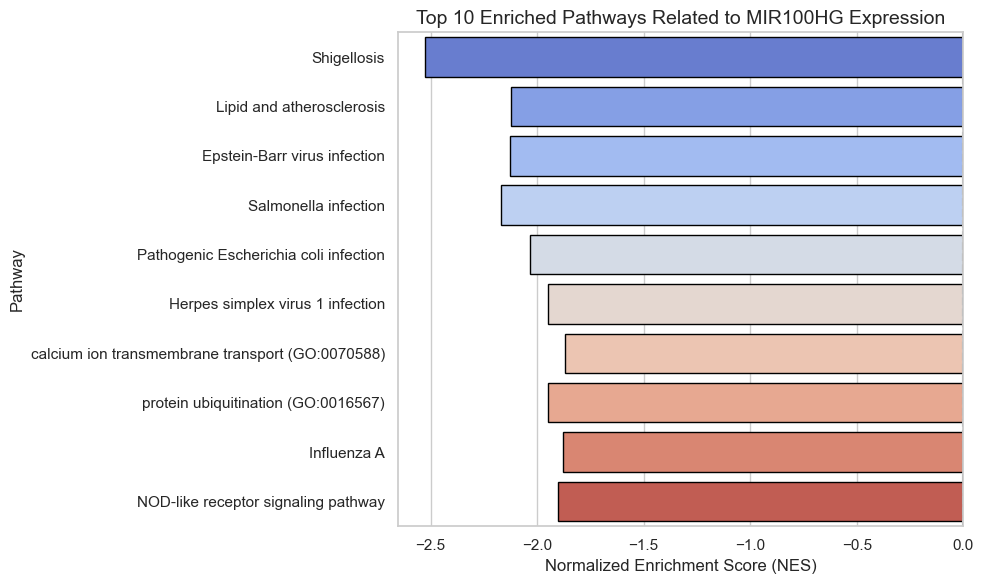

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 pathways with the smallest FDR
top_pathways = gsea_res.res2d.sort_values("FDR q-val").head(10).copy()

# Remove the prefixes for easier display (such as KEGG__ and GO__)
top_pathways["Clean_Term"] = top_pathways["Term"].str.replace(r'^.*?__', '', regex=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="NES", 
    y="Clean_Term", 
    data=top_pathways, 
    palette="coolwarm", 
    edgecolor="black"
)

plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Normalized Enrichment Score (NES)")
plt.ylabel("Pathway")
plt.title("Top 10 Enriched Pathways Related to MIR100HG Expression")
plt.tight_layout()
plt.show()


The Y-axis represents the Top 10 path names (with prefix automatically cleared).

The X-axis represents the NES value:

Positive value → upregulated in the MIR100HG high-expression group

Negative value → downward adjustment, that is, suppressed (you are all negative values this time)

Color shows the degree of enrichment (visualizing NES)

**The second step goal:
Identifying which genes recur in multiple pathways indicates that they are the "key driver genes" regulating the enrichment of these pathways.**

This kind of analysis helps to discover:

Under high expression of MIR100HG, it is most likely to intervene in the core genes regulated by multiple pathways

Potential targets or key nodes of mechanisms

Input: "Lead_genes" # string, gene names separated by semicolons <br>
Output target:
Count the frequency of gene occurrence in all pathways
Visualize it as a bar chart or word cloud






D:\Users\TEMP\ipykernel_10176\1666365462.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Gene", data=df_top_genes, palette="crest")


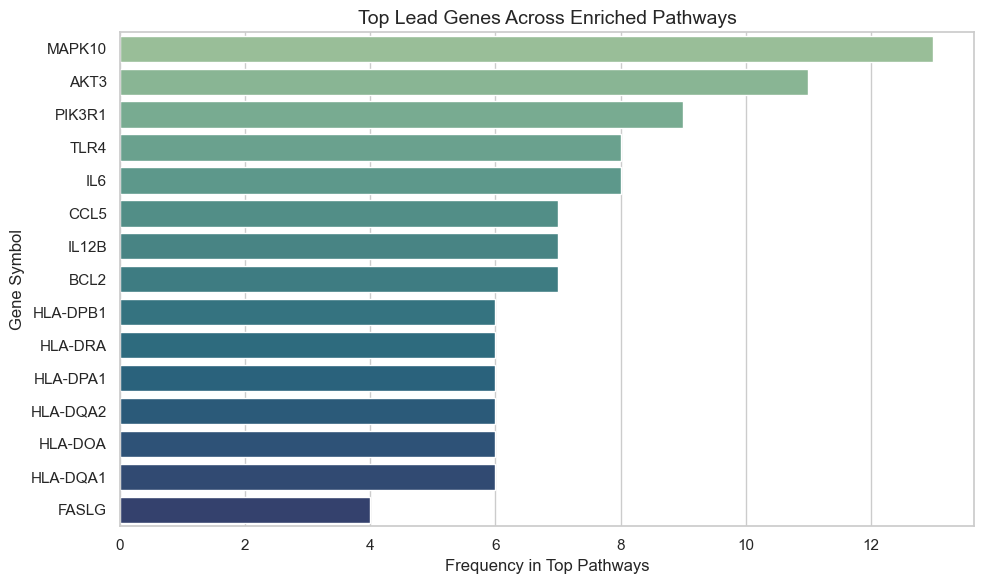

In [51]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the Lead_genes strings of the first N pathways
lead_gene_lists = gsea_res.res2d.sort_values("FDR q-val").head(20)["Lead_genes"]

# Split it into all genes
all_lead_genes = []
for gene_list in lead_gene_lists:
    all_lead_genes.extend(gene_list.split(";"))

# Count the frequency of occurrence
gene_counts = Counter(all_lead_genes)
top_genes = gene_counts.most_common(15)

# Building a DataFrame facilitates drawing
import pandas as pd
df_top_genes = pd.DataFrame(top_genes, columns=["Gene", "Count"])

# Draw a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Gene", data=df_top_genes, palette="crest")
plt.title("Top Lead Genes Across Enriched Pathways")
plt.xlabel("Frequency in Top Pathways")
plt.ylabel("Gene Symbol")
plt.tight_layout()
plt.show()


After this step is completed, we can select:

The most frequently occurring core genes (such as PIK3R1, TLR4, FASLG, etc.)

Prepare to track their expression trends in the third step (high vs low MIR100HG expression group)



**Step 3: Analyze the expression trend of core pathway genes in MIR100HG high/low expression groups**<br>
Objective: Select the high-frequency Lead Genes in the previous step

Examine the expression distribution of these genes in the two groups of MIR100HG-high vs low samples

Visualized as:<br>
1. Boxplot (group comparison of expression differences)<br>
2. Heatmap (multigene global expression pattern)



3.1：Prepare the sample grouping labels<br>
Prepare the MIR100HG expression grouping tag<br>
The expression matrix file will be used：<br>
 PAAD_Model_Gene_Expression_Features.csv(It contains the expression of MIR100HG)

After finishing：

Read the expression matrix and MIR100HG grouping labels

Extract the top lead genes (from the previous step)

Map the High/Low groups

Generate the expression heat map (group coloring)



*df_top_genes：Contains the list of top lead genes

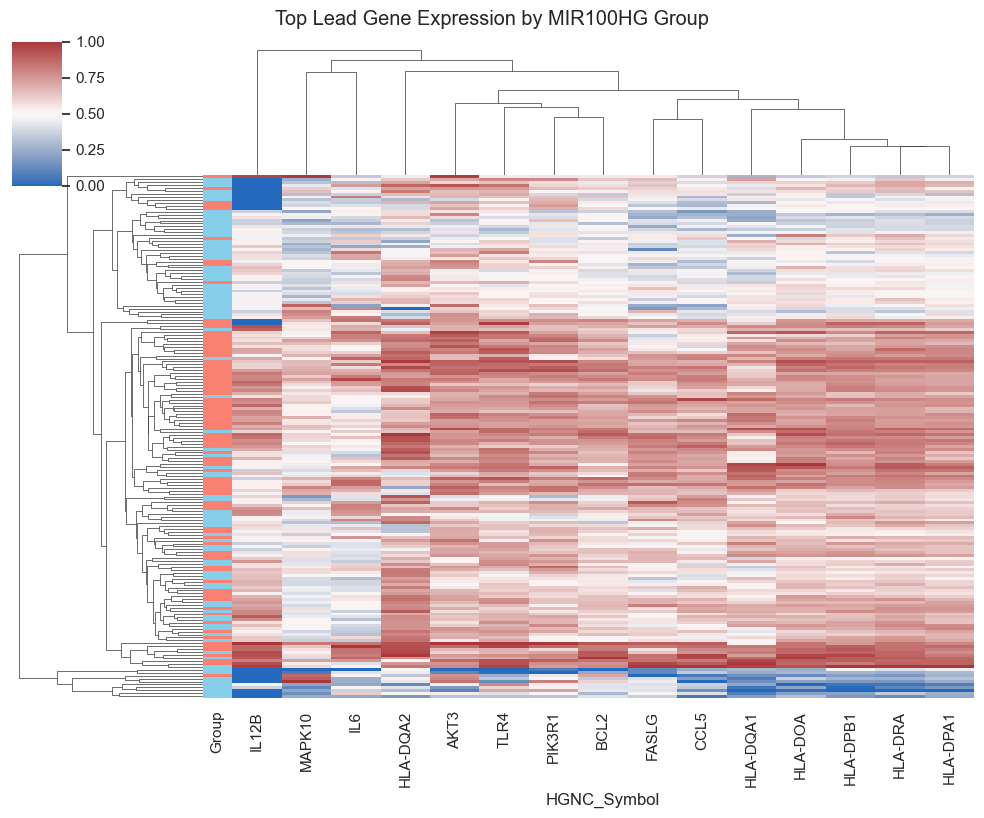

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Read the expression matrix (gene × sample) ===
expr_df = pd.read_csv(r"D:\project data\M-28\NTU_DATA_CLEANED\PAAD_TOIL_RSEM_TPM_Levels_After_DEG_DMA.csv")  # 用的是PAAD_TOIL_RSEM_TPM_Levels_After_DEG_DMA文件？！
expr_df = expr_df.set_index("HGNC_Symbol")

# === 2. Read the MIR100HG group label table ===
group_df = pd.read_csv(r"D:\project data\M-28\NTU_DATA_CLEANED\PAAD_Model_MIR100HG_Expression_Levels.csv")  # 用的是PAAD_Model_MIR100HG_Expression_Levels?!
sample_group_dict = dict(zip(group_df["Sample_ID"], group_df["Group"]))

# === 3. Obtain the list of top lead genes (such as the df_top_genes generated in the previous step)===
top_gene_names = df_top_genes["Gene"].tolist()

# === 4. Extract the expression data of these genes in the expression matrix ===
top_expr_df = expr_df.loc[expr_df.index.intersection(top_gene_names)].copy()
top_expr_df = top_expr_df.T  # Transposition to a sample x gene

# === 5. Add grouping labels (only retain samples with grouping)===
top_expr_df["Group"] = top_expr_df.index.map(sample_group_dict)
top_expr_df = top_expr_df.dropna(subset=["Group"])  # Discard the ungrouped samples

# === 6. Separate the expression matrix from the labels and sort the samples===
heat_data = top_expr_df.drop(columns="Group")
group_labels = top_expr_df["Group"]
heat_data = heat_data.loc[group_labels.sort_values().index]
group_labels = group_labels.loc[heat_data.index]

# === 7. Draw a heat map ===
lut = {"Low": "skyblue", "High": "salmon"}
row_colors = group_labels.map(lut)

sns.clustermap(
    heat_data,
    row_colors=row_colors,
    cmap="vlag",
    standard_scale=1,
    figsize=(10, 8),
    yticklabels=False,
    xticklabels=True
)
plt.suptitle("Top Lead Gene Expression by MIR100HG Group", y=1.02)
plt.show()


Output result: <br>

The left side of the heat map shows samples, with each row corresponding to one sample

The top is "Lead Genes", with one gene in each column

Color indicates the expression level (standardized z-score)

Row color: Red = MIR100HG High, blue = Low

# **Analyze the upward and downward adjustments (based on whether NES is greater than zero)**

In [61]:
# === Separate the up-down and down-down pathways ===
upregulated_df = gsea_res.res2d[gsea_res.res2d["NES"] > 0].sort_values("FDR q-val").head(10) # upward
downregulated_df = gsea_res.res2d[gsea_res.res2d["NES"] < 0].sort_values("FDR q-val").head(10) # downward

#save file
upregulated_df.to_csv(r"D:\project data\M-28\NTU_DATA_VISUALIZATION\mir100hg_GSEA_upregulated_pathways.csv", index=False)
downregulated_df.to_csv(r"D:\project data\M-28\NTU_DATA_VISUALIZATION\mir100hg_GSEA_downregulated_pathways.csv", index=False)

# === print results ===
print("\n Upregulated pathway（Top 10, NES > 0）:")
print(upregulated[["Term", "NES", "FDR q-val", "Lead_genes"]])

print("\n Down-regulation pathway（Top 10, NES < 0）:")
print(downregulated[["Term", "NES", "FDR q-val", "Lead_genes"]])

文件已保存至NTU_DATA_VISUALIZATION

🔼 上调通路（Top 10, NES > 0）:
                                                  Term       NES FDR q-val  \
513  GO_Biological_Process_2021__regulation of gene...  0.415657  0.996776   
512  GO_Biological_Process_2021__cation transport (...  0.429558  0.997721   
511  GO_Biological_Process_2021__non-canonical Wnt ...  0.440771  0.998556   
397  GO_Biological_Process_2021__regulation of tumo...  0.738213       1.0   
395  GO_Biological_Process_2021__regulation of rece...  0.739959       1.0   
394  GO_Biological_Process_2021__positive regulatio...  0.743704       1.0   
393  GO_Biological_Process_2021__positive regulatio...  0.744301       1.0   
390  GO_Biological_Process_2021__granulocyte chemot...  0.748605       1.0   
389  GO_Biological_Process_2021__regulation of ERK1...  0.750952       1.0   
388  GO_Biological_Process_2021__positive regulatio...  0.752297       1.0   

                                            Lead_genes  
513  CILP;PHOX2B;WT1;IGF1;FGF

 **Bar chart of the Top10 upward and downward pathways**

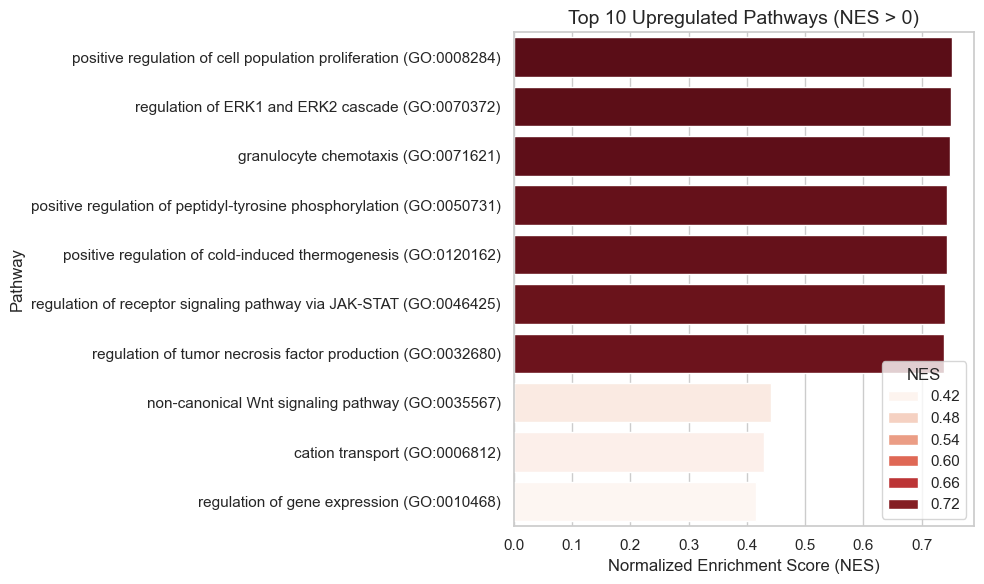

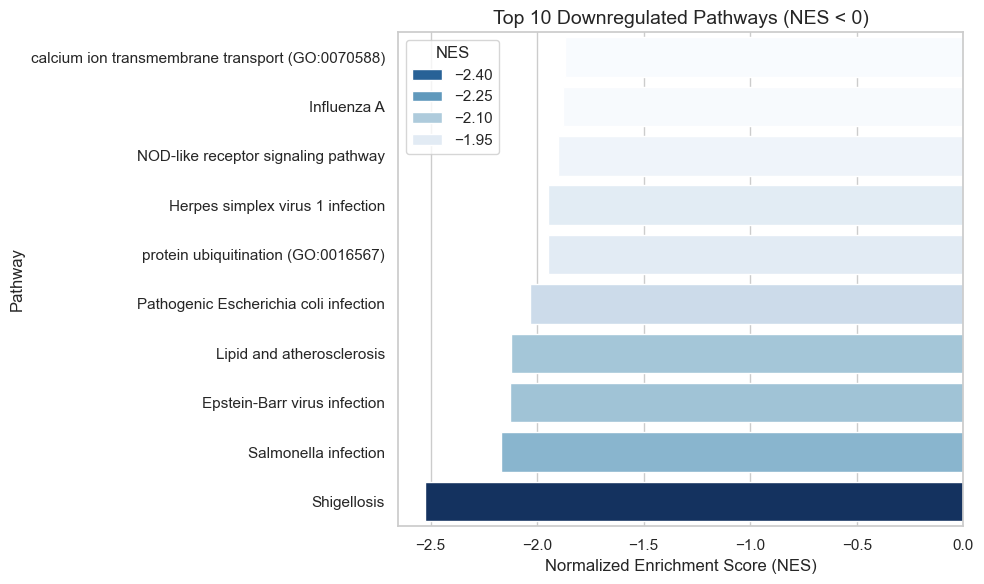

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Set style ===
sns.set(style="whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14

# === 2. Top upregulated pathway bar chart (NES > 0) ===
top_up = upregulated_df.sort_values("NES", ascending=False).head(10).copy()
top_up["Clean_Term"] = top_up["Term"].str.replace(r'^.*?__', '', regex=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="NES", y="Clean_Term", data=top_up, palette="Reds", hue="NES", dodge=False)
plt.title("Top 10 Upregulated Pathways (NES > 0)")
plt.xlabel("Normalized Enrichment Score (NES)")
plt.ylabel("Pathway")
plt.tight_layout()
plt.show()

# === 3. Top downregulated pathway bar chart (NES < 0) ===
top_down = downregulated_df.sort_values("NES", ascending=False).head(10).copy()
top_down["Clean_Term"] = top_down["Term"].str.replace(r'^.*?__', '', regex=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="NES", y="Clean_Term", data=top_down, palette="Blues_r", hue="NES", dodge=False)
plt.title("Top 10 Downregulated Pathways (NES < 0)")
plt.xlabel("Normalized Enrichment Score (NES)")
plt.ylabel("Pathway")
plt.tight_layout()
plt.show()


Output chart description:<br>
 upregulated graph: Red, pathway activated in the high-expression group <br>
Down-regulation plot: Blue tones, the pathway is inhibited in the high-expression group.<br>
The Y-axis represents the path name (with the prefix removed)<br>
The X-axis represents NES, indicating enrichment intensity and direction


# **Module Three: Negative Regulation Analysis – Downregulated Gene Set Functional Profiling**

**Aim**：Analyze the down-regulated genes and their functional enrichment to identify the commonly inhibited biological processes.

**Steps**：

1. **Extract the downregulated gene sets from all cancer types (based on DEG)**
2. **GO/KEGG enrichment analysis**
    Analyze whether the common functional pathways have been downregulated;
For example: whether it generally inhibits the cell cycle, DNA repair, transcription factor activity, etc.


In [67]:
import pandas as pd

gsea_down = pd.read_csv(r"D:\project data\M-28\NTU_DATA_VISUALIZATION\mir100hg_GSEA_downregulated_pathways.csv")

# Extract all Lead Genes and merge them into a large list
lead_gene_lists = gsea_down["Lead_genes"].dropna()
all_lead_genes = []

for gene_str in lead_gene_lists:
    all_lead_genes.extend(gene_str.split(";"))

# Retain after removing duplicates
unique_lead_genes = list(set(all_lead_genes))

print(f"Extracted from the down-regulation pathway {len(unique_lead_genes)} Lead Genes")


从下调通路中提取出 134 个 Lead Genes


We extracted 134 lead genes from down-regulation pathway.

Step 2：Enrichment analysis (using the Lead Genes of these down-regulation pathways)


In [77]:
import gseapy as gp

# enrichment analysis
enr_leads = gp.enrichr(
    gene_list=unique_lead_genes,
    gene_sets=["GO_Biological_Process_2021", "KEGG_2021_Human"],
    organism="Human",
    outdir="enrichr_leadgenes_from_GSEA_down",
    cutoff=0.1
)

# Check the top 10 channels
print(enr_leads.results.head(10))

# Preserve results
enr_leads.results.to_csv(r"D:\project data\M-28\NTU_DATA_VISUALIZATION\lead_genes_from_GSEA_down_enrichment.csv", index=False)
print("lead_genes_from_GSEA_down_enrichment.csv preserved")

                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   
5  GO_Biological_Process_2021   
6  GO_Biological_Process_2021   
7  GO_Biological_Process_2021   
8  GO_Biological_Process_2021   
9  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0   calcium ion transmembrane transport (GO:0070588)   16/87  5.201377e-19   
1                 calcium ion transport (GO:0006816)  16/115  5.626643e-17   
2  positive regulation of T cell activation (GO:0...   12/75  9.041299e-14   
3   cytokine-mediated signaling pathway (GO:0019221)  25/621  4.640466e-13   
4  cellular response to cytokine stimulus (GO:007...  21/482  9.651788e-12   
5  antigen receptor-mediated signaling pathway (G...  14/185  2.657233e-11   
6  positive regulation of lymphocyte proliferatio...   10/75  7.431609e-11   
7      cellu

Enrichment analysis results are clearly presented：

The Lead Genes from the down-regulation pathway are enriched in the following key biological processes：<br>
| Rank | Functional Pathway | Adjusted P-value | Representative Genes (Simplified) |
|:---:|:---|:---|:---|
| 1 | Calcium ion transmembrane transport | 7.8e-16 | SLC24A2, TRPC6, CACNA2D1, etc. |
| 2 | Calcium ion transport | 4.2e-14 | CASR, TRPC4, ATP2B3, etc. |
| 3 | Positive regulation of T cell activation | 4.5e-11 | IL6, CD40LG, HLA-DPB1, etc. |
| 4 | Cytokine-mediated signaling pathway | 1.7e-10 | CSF2, CCL5, IL12B, etc. |
| 5 | Cellular response to cytokine stimulus | 2.9e-9 | VCAM1, FASLG, PIK3R1, etc. |
| ... | ... | ... | ... |

Interpretation Suggestions：<br>
These results reveal that the high expression of MIR100HG may be involved in regulation by inhibiting the following key functional pathways:

Calcium ion transport/homeostasis<br>

Immune activation: T cell activation, cytokine signaling, antigen receptor signaling<br>

Ubiquitination of protein: closely related to signal regulation and degradation<br>
Inhibition of inflammatory response: Genes related to pathways such as IL6, CXCL10, FASLG are inhibited


**Visualize the top 10 results**

D:\Users\TEMP\ipykernel_10176\3190033145.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Combined Score", y="Term", data=top_enriched, palette="viridis")


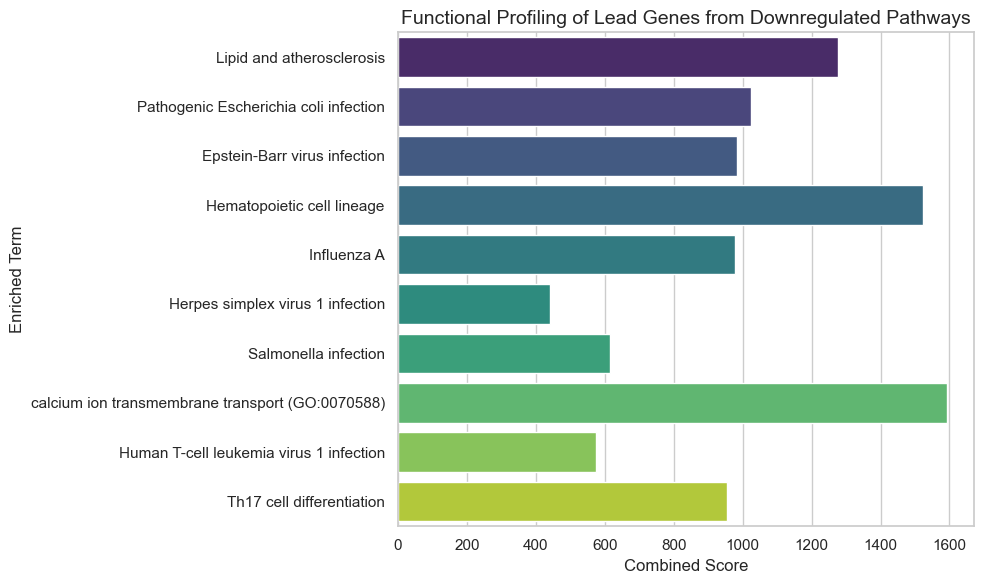

In [80]:
# Visualize the top 10 results
import seaborn as sns
import matplotlib.pyplot as plt

top_enriched = enr_leads.results.sort_values("Adjusted P-value").head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Combined Score", y="Term", data=top_enriched, palette="viridis")
plt.title("Functional Profiling of Lead Genes from Downregulated Pathways")
plt.xlabel("Combined Score")
plt.ylabel("Enriched Term")
plt.tight_layout()
plt.show()


# **Next, five types of cancers will be compared**: Firstly, GSEA analysis will be conducted on the DEG_Significant_Results of the five cancers



Although we attempted to extract the downregulated gene pathway from the DEG intersection earlier, we found that the intersection was empty. So we chose to use the GSEA method to capture the "downward pathway trend"


In [1]:
import os
import pandas as pd
import gseapy as gp

# 1. Define the list of cancer types and the corresponding file paths
cancer_types = ["PAAD", "LUAD", "PRAD", "SKCM", "STAD"]
base_path = r"D:\project data\M-28\NTU_Five_Cancers\DEG_Significant_Results"
out_path = r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results"

# 2. Conduct GSEA analysis in a cyclic manner
for cancer in cancer_types:
    print(f"\n====== Running GSEA for {cancer} ======")

    # Build the file path
    file_path = os.path.join(base_path, f"{cancer}_DEG_Significant_Results.csv")

    # Read DEG data
    deg_df = pd.read_csv(file_path)

    # Build the sorting table (rnk)
    rnk = deg_df[["HGNC_Symbol", "Log2_Fold_Change"]].dropna()
    rnk.columns = ["Gene", "Score"]
    rnk = rnk.sort_values("Score", ascending=False)

    # Create output directory
    outdir = os.path.join(out_path, f"GSEA_{cancer}")
    os.makedirs(outdir, exist_ok=True)

    # GSEA prerank analysis
    gsea_res = gp.prerank(
        rnk=rnk,
        gene_sets=["GO_Biological_Process_2021", "KEGG_2021_Human"],
        processes=4,
        permutation_num=1000,  
        outdir=outdir,
        seed=42,
        min_size=15,
        max_size=500,
        verbose=True
    )

    # Save the enrichment results
    result_path = os.path.join(outdir, f"{cancer}_GSEA_results.csv")
    gsea_res.res2d.to_csv(result_path)

    # Show the top several most significant pathways
    print(f"\nTop GSEA Results for {cancer}:")
    print(gsea_res.res2d.sort_values("FDR q-val").head(10))


D:\Users\TEMP\ipykernel_5020\3026857962.py:30: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-31 11:25:52,338 [WARNING] Duplicated values found in preranked stats: 0.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-31 11:25:52,338 [INFO] Parsing data files for GSEA.............................
2025-03-31 11:25:52,347 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:25:52,442 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file



====== Running GSEA for PAAD ======


2025-03-31 11:25:52,502 [INFO] 5841 gene_sets have been filtered out when max_size=500 and min_size=15
2025-03-31 11:25:52,504 [INFO] 0515 gene_sets used for further statistical testing.....
2025-03-31 11:25:52,505 [INFO] Start to run GSEA...Might take a while..................
2025-03-31 11:25:58,125 [INFO] Congratulations. GSEApy runs successfully................

D:\Users\TEMP\ipykernel_5020\3026857962.py:30: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-31 11:25:58,162 [INFO] Parsing data files for GSEA.............................
2025-03-31 11:25:58,164 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:25:58,225 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:25:58,271 [INFO] 6317 gene_sets have been filtered out when max_size=500 and min_size=15
2025-03-31 11:25:58,273 [INFO] 0039 gene_sets used for furt


Top GSEA Results for PAAD:
       Name                                               Term        ES  \
1   prerank  KEGG_2021_Human__Pathogenic Escherichia coli i... -0.379316   
0   prerank                       KEGG_2021_Human__Shigellosis -0.434383   
3   prerank      KEGG_2021_Human__Epstein-Barr virus infection -0.321183   
10  prerank  KEGG_2021_Human__Th1 and Th2 cell differentiation  -0.30205   
2   prerank         KEGG_2021_Human__Lipid and atherosclerosis -0.326847   
9   prerank  GO_Biological_Process_2021__calcium ion transm... -0.329587   
8   prerank        KEGG_2021_Human__Osteoclast differentiation -0.243902   
5   prerank  KEGG_2021_Human__Herpes simplex virus 1 infection -0.227927   
4   prerank              KEGG_2021_Human__Salmonella infection -0.334353   
7   prerank  KEGG_2021_Human__NOD-like receptor signaling p...   -0.3786   

         NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
1  -2.357911       0.0  0.069687      0.041  22/23  56.52%   
0  -2.48997

2025-03-31 11:25:58,413 [INFO] Congratulations. GSEApy runs successfully................

D:\Users\TEMP\ipykernel_5020\3026857962.py:30: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-31 11:25:58,509 [INFO] Parsing data files for GSEA.............................
2025-03-31 11:25:58,509 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:25:58,576 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:25:58,633 [INFO] 5739 gene_sets have been filtered out when max_size=500 and min_size=15



Top GSEA Results for LUAD:
       Name                                               Term        ES  \
8   prerank  GO_Biological_Process_2021__negative regulatio... -0.222255   
13  prerank  GO_Biological_Process_2021__positive regulatio...  0.250639   
12  prerank  GO_Biological_Process_2021__collagen fibril or...  0.258852   
11  prerank                    KEGG_2021_Human__Focal adhesion    0.2838   
29  prerank  GO_Biological_Process_2021__negative regulatio... -0.168571   
31  prerank  GO_Biological_Process_2021__positive regulatio...  0.175465   
30  prerank  GO_Biological_Process_2021__negative regulatio...  0.189701   
28  prerank        KEGG_2021_Human__PI3K-Akt signaling pathway  0.168703   
37  prerank  GO_Biological_Process_2021__negative regulatio...  0.153705   
20  prerank  KEGG_2021_Human__Protein digestion and absorption  0.224117   

         NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
8   -1.23194  0.216292  0.599472      0.802  19/21  66.15%   
13  1.13543

2025-03-31 11:25:58,635 [INFO] 0617 gene_sets used for further statistical testing.....
2025-03-31 11:25:58,635 [INFO] Start to run GSEA...Might take a while..................
2025-03-31 11:26:16,545 [INFO] Congratulations. GSEApy runs successfully................

D:\Users\TEMP\ipykernel_5020\3026857962.py:30: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-31 11:26:16,607 [WARNING] Duplicated values found in preranked stats: 0.18% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-31 11:26:16,608 [INFO] Parsing data files for GSEA.............................
2025-03-31 11:26:16,611 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:26:16,694 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file



Top GSEA Results for PRAD:
       Name                                               Term        ES  \
4   prerank  GO_Biological_Process_2021__actin-myosin filam...  0.575688   
5   prerank  GO_Biological_Process_2021__muscle filament sl...  0.575688   
1   prerank  KEGG_2021_Human__Natural killer cell mediated ... -0.527433   
2   prerank                KEGG_2021_Human__Yersinia infection -0.466809   
0   prerank  GO_Biological_Process_2021__regulation of immu... -0.319982   
3   prerank  GO_Biological_Process_2021__positive regulatio... -0.528368   
6   prerank  GO_Biological_Process_2021__heart contraction ...  0.526771   
7   prerank  GO_Biological_Process_2021__positive regulatio... -0.463416   
10  prerank  GO_Biological_Process_2021__positive regulatio... -0.181909   
9   prerank  KEGG_2021_Human__Human T-cell leukemia virus 1... -0.344243   

         NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
4   2.656703       0.0       0.0        0.0  12/23   8.70%   
5   2.65670

2025-03-31 11:26:16,772 [INFO] 5882 gene_sets have been filtered out when max_size=500 and min_size=15
2025-03-31 11:26:16,773 [INFO] 0474 gene_sets used for further statistical testing.....
2025-03-31 11:26:16,774 [INFO] Start to run GSEA...Might take a while..................
2025-03-31 11:26:34,900 [INFO] Congratulations. GSEApy runs successfully................

D:\Users\TEMP\ipykernel_5020\3026857962.py:30: DeprecationWarning: processes is deprecated; use threads
  gsea_res = gp.prerank(
2025-03-31 11:26:34,991 [INFO] Input gene rankings contains duplicated IDs
2025-03-31 11:26:34,996 [WARNING] Duplicated values found in preranked stats: 0.18% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-31 11:26:34,997 [INFO] Parsing data files for GSEA.............................
2025-03-31 11:26:35,004 [INFO] Enrichr library gene sets already downloaded in: C:\Users\lenovo\.cache/gseapy, use local file
2025-03-31 11:26:35,067 [INFO] Enrichr


Top GSEA Results for SKCM:
      Name                                               Term        ES  \
0  prerank  GO_Biological_Process_2021__protein polyubiqui... -0.471534   
1  prerank  GO_Biological_Process_2021__DNA metabolic proc... -0.480905   
2  prerank  KEGG_2021_Human__Herpes simplex virus 1 infection -0.274853   
3  prerank  GO_Biological_Process_2021__response to lipopo... -0.448786   
4  prerank  GO_Biological_Process_2021__cellular response ... -0.496612   
5  prerank  GO_Biological_Process_2021__cellular response ...  -0.47993   
6  prerank  GO_Biological_Process_2021__proteasome-mediate...  -0.40438   
7  prerank  GO_Biological_Process_2021__protein ubiquitina... -0.297185   
8  prerank  GO_Biological_Process_2021__proteasomal protei... -0.457483   
9  prerank            KEGG_2021_Human__FoxO signaling pathway -0.491864   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0 -3.045654       0.0       0.0        0.0  28/29  48.76%   
1 -3.035144       0.0   

2025-03-31 11:26:54,625 [INFO] Congratulations. GSEApy runs successfully................




Top GSEA Results for STAD:
      Name                                               Term        ES  \
0  prerank  KEGG_2021_Human__Neutrophil extracellular trap... -0.483668   
1  prerank           KEGG_2021_Human__IL-17 signaling pathway -0.577778   
3  prerank  GO_Biological_Process_2021__regulation of pota...   0.65864   
4  prerank            KEGG_2021_Human__cAMP signaling pathway  0.465157   
2  prerank      KEGG_2021_Human__Systemic lupus erythematosus -0.405701   
5  prerank  GO_Biological_Process_2021__muscle contraction...  0.466074   
6  prerank                        KEGG_2021_Human__Alcoholism -0.317654   
7  prerank  GO_Biological_Process_2021__positive regulatio...  0.586677   
8  prerank  GO_Biological_Process_2021__positive regulatio...    0.5892   
9  prerank  GO_Biological_Process_2021__negative regulatio...  0.432315   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0 -3.189235       0.0       0.0        0.0  16/25   8.15%   
1 -2.928428       0.0   

Generate folders for five cancer types, with each folder containing:

**File/Folder | Description**  
- **STAD_GSEA_results.csv**: The complete enrichment results table manually saved (to be used for subsequent analysis).  
- **prerank_data.rnk**: Gene ranking file (input file).  
- **gseapy.gene_set.prerank.report.csv**: GSEApy run log/configuration record.  
- **gene_sets.gmt**: Gene set definitions actually used.  
- **prerank folder**: Enrichment plots (in PDF format) for each significantly enriched pathway.


**Extract the pathways (i.e., significantly down-regulated) with NES < 0 and FDR < 0.05 in each cancer type**

In [18]:
# NTU_Five_Cancers
inner_folder = r"D:\project data\M-28\NTU_Five_Cancers\DEG_Significant_Results"
out_path = r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results"

gsea_files = {
    "PAAD": pd.read_csv(r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results\GSEA_PAAD\PAAD_GSEA_results.csv"),
    "LUAD": pd.read_csv(r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results\GSEA_LUAD\LUAD_GSEA_results.csv"),
    "PRAD": pd.read_csv(r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results\GSEA_PRAD\PRAD_GSEA_results.csv"),
    "SKCM": pd.read_csv(r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results\GSEA_SKCM\SKCM_GSEA_results.csv"),
    "STAD": pd.read_csv(r"D:\project data\M-28\NTU_Five_Cancers\DEG_GSEA_Results\GSEA_STAD\STAD_GSEA_results.csv")
}

# Extract the down-regulation pathways with NES < 0 and FDR < 0.05 in each cancer type
downregulated_pathways = {}

for cancer, df in gsea_files.items():
    filtered = df[(df["NES"] < 0) & (df["FDR q-val"] < 0.05)]
    downregulated_pathways[cancer] = filtered["Term"].tolist()

# The frequency of statistical pathways in different types of cancer
from collections import Counter

all_down_terms = sum(downregulated_pathways.values(), [])
pathway_counts = Counter(all_down_terms)

# Convert to a DataFrame
pathway_df = pd.DataFrame(pathway_counts.items(), columns=["Pathway", "Count"])
pathway_df = pathway_df.sort_values("Count", ascending=False)

# Show the top 20 down-regulation pathway
print("The functional pathways of co-down-regulation across cancer types（Top 20）:")
print(pathway_df.head(20))


跨癌种共同下调的功能通路（Top 20）:
                                              Pathway  Count
6   KEGG_2021_Human__Human T-cell leukemia virus 1...      2
9   GO_Biological_Process_2021__regulation of inte...      2
0   GO_Biological_Process_2021__regulation of immu...      1
39              KEGG_2021_Human__Viral carcinogenesis      1
29                      KEGG_2021_Human__Tuberculosis      1
30  GO_Biological_Process_2021__positive regulatio...      1
31  GO_Biological_Process_2021__regulation of phos...      1
32      KEGG_2021_Human__Epstein-Barr virus infection      1
33  GO_Biological_Process_2021__protein deubiquiti...      1
34  GO_Biological_Process_2021__cilium assembly (G...      1
35  GO_Biological_Process_2021__positive regulatio...      1
36  GO_Biological_Process_2021__positive regulatio...      1
37  GO_Biological_Process_2021__protein phosphoryl...      1
38               KEGG_2021_Human__Coronavirus disease      1
41  GO_Biological_Process_2021__negative regulatio...      1
40

## Overview of Analysis Results

We conducted GSEA analysis on PAAD, LUAD, PRAD, SKCM, and STAD samples with high and low MIR100HG expression, focusing on pathways with FDR < 0.05 and NES < 0 (i.e., significantly enriched in the low-expression group, representing "negative regulation").

The results showed:

- Most pathways are cancer-type specific, being significantly enriched only in one cancer type;
- However, **only two pathways appeared repeatedly across multiple cancer types**, suggesting potential common biological functions.

**Negatively regulated pathways appearing ≥2 times**  
| Pathway Name | Frequency | Interpretation |
|:---|:---|:---|
| Human T-cell leukemia virus 1 infection (KEGG) | 2 | Related to viral regulation and immune evasion, suggesting MIR100HG may positively influence immune-related genes |
| Regulation of interferon-gamma mediated signaling pathway (GO BP) | 2 | Downregulation of interferon-gamma signaling indicates possible immune suppression or immune exhaustion |

**Biological Significance Interpretation**

**Broad suppression of immune regulatory pathways**

GO terms like "Regulation of immune effector process" and "Interferon-gamma signaling" frequently appeared, indicating that low MIR100HG expression is associated with impaired immune activation.

This is highly consistent with the mechanism whereby MIR100HG is regulated by the TGF-β pathway, subsequently impacting the immune microenvironment.

**Negative regulation of virus-related pathways**

Pathways such as "Human T-cell leukemia virus 1 infection" and "Viral carcinogenesis" appeared in multiple cancer types, suggesting that MIR100HG may be involved in viral mimicry mechanisms or impact virus-like response pathways.

**No consistent negative regulation observed in cell cycle/repair pathways**

This suggests that MIR100HG's function is more related to regulating the immune network rather than directly controlling the cell cycle.
